# Projet de Fouille de donnees Textuelles

### Import des librairies

In [46]:
# Import some librairies
import numpy as np
import pandas as pd
import seaborn as sns
import re
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_20newsgroups

### Overview of the data

In [47]:
raw_data = fetch_20newsgroups()
# Have a Look on one data
print(raw_data.data[6])
# Display all possible classes
print("Classes: ",raw_data.target_names)
np.shape(raw_data.data)

From: bmdelane@quads.uchicago.edu (brian manning delaney)
Subject: Brain Tumor Treatment (thanks)
Reply-To: bmdelane@midway.uchicago.edu
Organization: University of Chicago
Lines: 12

There were a few people who responded to my request for info on
treatment for astrocytomas through email, whom I couldn't thank
directly because of mail-bouncing probs (Sean, Debra, and Sharon).  So
I thought I'd publicly thank everyone.

Thanks! 

(I'm sure glad I accidentally hit "rn" instead of "rm" when I was
trying to delete a file last September. "Hmmm... 'News?' What's
this?"....)

-Brian

Classes:  ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


(11314,)

In [48]:
# I choose four type of texts : talk.politics.misc, soc.religion.christian, comp.os.ms-windows.misc, rec.sport.baseball
classes = ["talk.politics.misc", "soc.religion.christian", "comp.os.ms-windows.misc", "rec.sport.baseball"]
#classes = ['alt.atheism', 'soc.religion.christian','comp.graphics']
#Get Train and test datas
#raw_data_train = fetch_20newsgroups(subset='train', categories=classes)
#raw_data_test = fetch_20newsgroups(subset='test', categories=classes)
raw_data = fetch_20newsgroups(categories=classes)
#Shapes
print("Train data shape ", np.shape(raw_data.data))

Train data shape  (2252,)


## 1- Text Processing and Transformation

In [55]:
#Convert text do features
def clean_and_split_document(document):   
    words = re.sub("[^\w]", " ", document).split()
    cleaned_text = [w.lower() for w in words]    
    return cleaned_text

def all_document_tokenized(all_documents):    
    tokens = []
    # document and tokens
    documents = []
    for document in all_documents:        
        document_clean = clean_and_split_document(document)
        documents.append(document_clean)
        tokens.extend(document_clean)
    tokens = sorted(list(set(tokens)))
    return tokens, documents


def CountVectorizerOwn(all_documents):
    tokens, documents = all_document_tokenized(all_documents)    
    data = []
    # Extract feature in data
    for i, document in enumerate(documents):        
        bag_vector = np.zeros(len(tokens))
        for j, token in enumerate(tokens):
            bag_vector[j] = document.count(token)
        data.append(np.array(bag_vector))
    return np.array(data)
        
        
def TfidfTransformerOwn(data):
    # Term Frequencies
    #Data 
    for i, li in enumerate(data):
        data[i] = li/np.sum(li)
        
    # Inverse Document Frequency
    #Data train
    nb_documents = len(data[:,0])
    nb_features = len(data[0])
    for i in range(nb_features):
        non_zero = np.count_nonzero(data[:,i])
        data[:,i] = data[:,i] * (np.log(nb_documents / non_zero) / np.log(10))
        
    return data

In [56]:
#raw_data_train = ['This movie is very scary and long','This movie is not scary and is slow',
#'This movie is spooky and good']
#raw_data_test = ['Movie complee very long', 'Slow down This scary']
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

def TextProcessing(raw_data, method):
    if(method == "my_own"):
        #Transform Data
        data = CountVectorizerOwn(raw_data)
        print(data)
        data = TfidfTransformerOwn(data)
    elif method == "scikit-learn":
        data = CountVectorizer().fit_transform(raw_data)
        tf_transformer = TfidfTransformer(use_idf=False).fit(data)
        data = tf_transformer.transform(data)
    return data

In [57]:
#raw_data = raw_data.data
#data = TextProcessing(raw_data, "scikit-learn")
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(raw_data.data,raw_data.target, train_size=0.8, test_size=0.2, random_state=42)

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
     ('clf', KNeighborsClassifier(n_neighbors=5)),
])
text_clf.fit(X_train, y_train)

predicted = text_clf.predict(X_test)
score = np.sum(predicted == y_test) / len(y_test)
print("Score ", score)

Score  0.9090909090909091


In [58]:
clf_own = Pipeline([
    ('vect', CountVectorizerOwn()),
    ('tfidf', TfidfTransformerOwn()),
     ('clf', KNeighborsClassifier(n_neighbors=5)),
])
clf_own.fit(X_train, y_train)

predicted = clf_own.predict(X_test)
score = np.sum(predicted == y_test) / len(y_test)
print("Score ", score)

TypeError: CountVectorizerOwn() missing 1 required positional argument: 'all_documents'

### Dataset

In [40]:
data

<2252x62661 sparse matrix of type '<class 'numpy.float64'>'
	with 401373 stored elements in Compressed Sparse Row format>

### Test Dataset

## 2- Analysis of the dataset

In [41]:
data.isnull().sum()

AttributeError: isnull not found

In [24]:
data.isna().sum()

0               0
00              0
000             0
000005102000    0
0001            0
               ..
ªl              0
ñ               0
ú               0
þ               0
ÿ               0
Length: 27870, dtype: int64

### . Show some statistics on the Data

In [2]:
data.describe()

NameError: name 'data_train' is not defined

### Correlation Matrix

NameError: name 'sns' is not defined

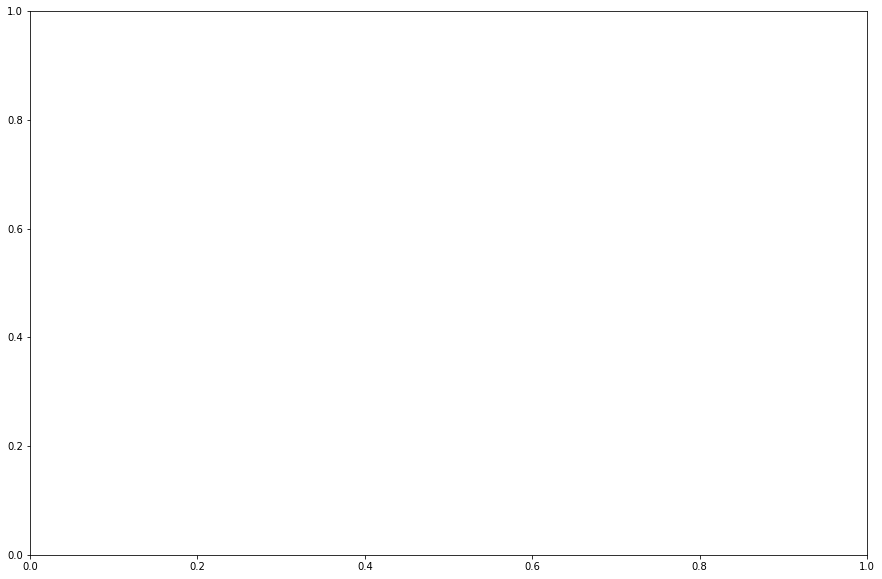

In [1]:
from matplotlib import pyplot as plt
s , ax = plt.subplots(figsize =( 15 , 10))
cmap = sns.diverging_palette(250 , 10 , as_cmap = True )
s = sns.heatmap(data_train.corr(), cmap = cmap, square=True,ax=ax, annot = True,cbar_kws={'shrink' : .9 }, annot_kws = {'fontsize':12})

## 3- Machine Learning

In [26]:
#SVM
from sklearn.svm import SVM
model_1 = SVC(gamma='auto')
model_1.fit(X_train, y_train)
predictions = model_1.predict(X_test)

ImportError: cannot import name 'SVM' from 'sklearn.svm' (/home/komlan/anaconda3/envs/anaconda/lib/python3.7/site-packages/sklearn/svm/__init__.py)

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model_2 = KNeighborsClassifier(n_neighbors=5)
model_2.fit(X_train, y_train)
predictions = model_2.predict(X_test)

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model_3 = DecisionTreeClassifier(max_depth=2)
model_3.fit(X_train, y_train)
predict_dt = model_3.predict(X_test)
print(predict_dt)

In [286]:
l = [2,4,2,6,2]
l[:,2]

TypeError: list indices must be integers or slices, not tuple

In [218]:
1

1

In [ ]:
raw_data_train = ['This movie is very scary and long','This movie is not scary and is slow',
'This movie is spooky and good']
raw_data_test = ['Movie complee very long', 'Slow down This scary']